In [31]:
import pandas as pd
import yfinance as yf
import talib as ta
import numpy as np

In [32]:
ticker = "BTC-USD"
df = yf.Ticker(ticker).history(period="max")

In [33]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [34]:
df.shape

(3503, 7)

In [35]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-15 00:00:00+00:00,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,0.0,0.0
2024-04-16 00:00:00+00:00,63419.296875,64355.667969,61716.402344,63811.863281,42847528078,0.0,0.0
2024-04-17 00:00:00+00:00,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.0,0.0
2024-04-18 00:00:00+00:00,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.0,0.0
2024-04-19 00:00:00+00:00,63509.769531,65068.695312,59698.507812,64901.183594,49755013120,0.0,0.0


In [36]:
df['Settle'] = (df['High']-df['Open'])*100
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Settle
Date,,,,,,,,
2024-04-15 00:00:00+00:00,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,0.0,0.0,113900.000000
2024-04-16 00:00:00+00:00,63419.296875,64355.667969,61716.402344,63811.863281,42847528078,0.0,0.0,93637.109375
2024-04-17 00:00:00+00:00,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.0,0.0,65451.562500
2024-04-18 00:00:00+00:00,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.0,0.0,285037.109375
2024-04-19 00:00:00+00:00,63509.769531,65068.695312,59698.507812,64901.183594,49755013120,0.0,0.0,155892.578125


In [37]:
time_period_ATR = 14
time_period_ADX = 14
time_period_RSI = 14
time_period_SMA = 30

In [38]:
df['EMA12'] = ta.EMA(df['Settle'].values, timeperiod=12)
df['EMA26'] = ta.EMA(df['Settle'].values, timeperiod=26)
df['MA12'] = ta.MA(df['Settle'].values, timeperiod=12)
df['MA26'] = ta.MA(df['Settle'].values, timeperiod=26)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Settle'].values, timeperiod=time_period_ATR) # 1
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Settle'].values, timeperiod=time_period_ADX) # 2
df['RSI'] = ta.RSI(df['Settle'].values, timeperiod=time_period_ADX) # 3
df['SMA'] = ta.SMA(df['Settle'].values, timeperiod=time_period_SMA) # 4
macd, macdsignal, macdhist = ta.MACD(df['Settle'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACDsignal'] = macdsignal
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Settle,EMA12,EMA26,MA12,MA26,ATR,ADX,RSI,SMA,MACD,MACDsignal
Date,,,,,,,,,,,,,,,,,,
2024-04-15 00:00:00+00:00,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,0.0,0.0,113900.000000,134522.559957,145852.314746,148583.561198,146845.567909,106598.918087,18.835983,49.131080,163236.497396,-11329.754790,-11471.615069
2024-04-16 00:00:00+00:00,63419.296875,64355.667969,61716.402344,63811.863281,42847528078,0.0,0.0,93637.109375,128232.490636,141984.521756,128756.966146,149337.740385,102712.109485,19.528137,48.604678,154593.151042,-13752.031120,-11927.698279
2024-04-17 00:00:00+00:00,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.0,0.0,65451.562500,118573.886308,136315.413663,132461.263021,147494.260817,97794.710481,20.681353,47.836903,155022.109375,-17741.527355,-13090.464094
2024-04-18 00:00:00+00:00,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.0,0.0,285037.109375,144183.612933,147331.835567,141305.761719,150096.935096,91139.237021,21.752197,53.941136,162687.356771,-3148.222634,-11102.015802
2024-04-19 00:00:00+00:00,63509.769531,65068.695312,59698.507812,64901.183594,49755013120,0.0,0.0,155892.578125,145984.992194,147965.964646,142735.807292,142431.250000,100724.905917,23.037389,50.218996,147266.770833,-1980.972452,-9277.807132


In [39]:
df['ClgtEMA12'] = np.where(df['Settle'] > df['EMA12'], 1, -1)
df['ClgtEMA26'] = np.where(df['Settle'] > df['EMA26'], 1, -1)
df['ClgtMA12'] = np.where(df['Settle'] > df['MA12'], 1, -1)
df['ClgtMA26'] = np.where(df['Settle'] > df['MA26'], 1, -1)
df['MACDSIGgtMACD'] = np.where(df['MACDsignal'] > df['MACD'], 1, -1)
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Settle,EMA12,EMA26,...,ADX,RSI,SMA,MACD,MACDsignal,ClgtEMA12,ClgtEMA26,ClgtMA12,ClgtMA26,MACDSIGgtMACD
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-15 00:00:00+00:00,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,0.0,0.0,113900.000000,134522.559957,145852.314746,...,18.835983,49.131080,163236.497396,-11329.754790,-11471.615069,-1,-1,-1,-1,-1
2024-04-16 00:00:00+00:00,63419.296875,64355.667969,61716.402344,63811.863281,42847528078,0.0,0.0,93637.109375,128232.490636,141984.521756,...,19.528137,48.604678,154593.151042,-13752.031120,-11927.698279,-1,-1,-1,-1,1
2024-04-17 00:00:00+00:00,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.0,0.0,65451.562500,118573.886308,136315.413663,...,20.681353,47.836903,155022.109375,-17741.527355,-13090.464094,-1,-1,-1,-1,1
2024-04-18 00:00:00+00:00,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.0,0.0,285037.109375,144183.612933,147331.835567,...,21.752197,53.941136,162687.356771,-3148.222634,-11102.015802,1,1,1,1,-1
2024-04-19 00:00:00+00:00,63509.769531,65068.695312,59698.507812,64901.183594,49755013120,0.0,0.0,155892.578125,145984.992194,147965.964646,...,23.037389,50.218996,147266.770833,-1980.972452,-9277.807132,1,1,1,1,-1


In [40]:
df['Return'] = df['Settle'].pct_change(1).shift(-1)
df['target_cls'] = np.where(df['Return'] > 0, 1, -1)
df['target_reg'] = df['Return']
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Settle,EMA12,EMA26,...,MACD,MACDsignal,ClgtEMA12,ClgtEMA26,ClgtMA12,ClgtMA26,MACDSIGgtMACD,Return,target_cls,target_reg
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,230.999756,NaN,NaN,...,NaN,NaN,-1,-1,-1,-1,-1,-1.000000,-1,-1.000000
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,0.000000,NaN,NaN,...,NaN,NaN,-1,-1,-1,-1,-1,inf,1,inf
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,373.199463,NaN,NaN,...,NaN,NaN,-1,-1,-1,-1,-1,6.669621,1,6.669621
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,2862.298584,NaN,NaN,...,NaN,NaN,-1,-1,-1,-1,-1,-0.848339,-1,-0.848339
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,434.100342,NaN,NaN,...,NaN,NaN,-1,-1,-1,-1,-1,0.800501,1,0.800501


In [41]:
predictors_list = ['ATR', 'ADX', 'RSI', 'SMA', 'ClgtEMA12', 'ClgtEMA26', 'ClgtMA12', 'ClgtMA26', 'MACDSIGgtMACD']
tmp = df[predictors_list]

tmp = tmp.fillna(0)
highest_non_inf = tmp.max().loc[lambda v: v<np.Inf].max()
tmp.replace(np.Inf, highest_non_inf)

tmp.tail()

,ATR,ADX,RSI,SMA,ClgtEMA12,ClgtEMA26,ClgtMA12,ClgtMA26,MACDSIGgtMACD
Date,,,,,,,,,
2024-04-15 00:00:00+00:00,106598.918087,18.835983,49.131080,163236.497396,-1,-1,-1,-1,-1
2024-04-16 00:00:00+00:00,102712.109485,19.528137,48.604678,154593.151042,-1,-1,-1,-1,1
2024-04-17 00:00:00+00:00,97794.710481,20.681353,47.836903,155022.109375,-1,-1,-1,-1,1
2024-04-18 00:00:00+00:00,91139.237021,21.752197,53.941136,162687.356771,1,1,1,1,-1
2024-04-19 00:00:00+00:00,100724.905917,23.037389,50.218996,147266.770833,1,1,1,1,-1


In [42]:
predictors_list = ['ATR', 'ADX', 'RSI', 'SMA', 'ClgtEMA12', 'ClgtEMA26', 'ClgtMA12', 'ClgtMA26', 'MACDSIGgtMACD']
X = df[predictors_list]
X.tail()

,ATR,ADX,RSI,SMA,ClgtEMA12,ClgtEMA26,ClgtMA12,ClgtMA26,MACDSIGgtMACD
Date,,,,,,,,,
2024-04-15 00:00:00+00:00,106598.918087,18.835983,49.131080,163236.497396,-1,-1,-1,-1,-1
2024-04-16 00:00:00+00:00,102712.109485,19.528137,48.604678,154593.151042,-1,-1,-1,-1,1
2024-04-17 00:00:00+00:00,97794.710481,20.681353,47.836903,155022.109375,-1,-1,-1,-1,1
2024-04-18 00:00:00+00:00,91139.237021,21.752197,53.941136,162687.356771,1,1,1,1,-1
2024-04-19 00:00:00+00:00,100724.905917,23.037389,50.218996,147266.770833,1,1,1,1,-1


In [43]:
y_cls = df.target_cls
y_cls.tail()

y_rgs = df.target_reg
y_rgs.tail()

Date
2024-04-15 00:00:00+00:00   -0.177901
2024-04-16 00:00:00+00:00   -0.301008
2024-04-17 00:00:00+00:00    3.354932
2024-04-18 00:00:00+00:00   -0.453080
2024-04-19 00:00:00+00:00         NaN
Name: target_reg, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
y=y_cls
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

print (X_cls_train.shape, y_cls_train.shape)
print (X_cls_test.shape, y_cls_test.shape)

(2452, 9) (2452,)
(1051, 9) (1051,)


In [45]:
train_length = int(len(df)*0.70)
X_rgs_train = X[:train_length]
X_rgs_test = X[train_length:]
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]

print (X_rgs_train.shape, y_rgs_train.shape)
print (X_rgs_test.shape, y_rgs_test.shape)

(2452, 9) (2452,)
(1051, 9) (1051,)


In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [47]:
clf = clf.fit(X_cls_train, y_cls_train)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

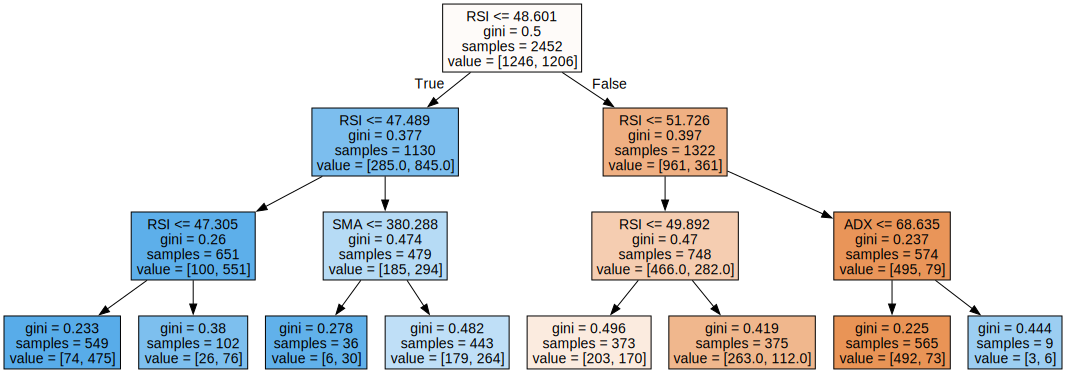

In [48]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,feature_names=predictors_list)
graph = graphviz.Source(dot_data)
graph


In [49]:
y_cls_pred = clf.predict(X_cls_test)


In [50]:
from sklearn.metrics import classification_report
report = classification_report(y_cls_test, y_cls_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.73      0.78      0.76       534
           1       0.76      0.70      0.73       517

    accuracy                           0.74      1051
   macro avg       0.74      0.74      0.74      1051
weighted avg       0.74      0.74      0.74      1051



In [51]:
if np.all(np.isfinite(X_rgs_train)) or np.all(np.isfinite(y_rgs_train)):
    print("! INFINITE !")


In [52]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X_rgs_train_with_imputed_values = my_imputer.fit_transform(X_rgs_train)
X_rgs_train1=np.array(X_rgs_train)

In [53]:
X_rgs_train.head()
X_rgs_train.isin([np.inf, -np.inf]).values.any()

False

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf = 200)
X_rgs_train.shape

(2452, 9)

In [55]:
import sys
np.all(X_rgs_train>sys.float_info.max)

False

In [56]:
def limitcomma(value, limit=2):
    v = str(value).split(".")
    if len(v)>1:
        return float(v[0]+"."+v[1][:limit])
    else:
        return float("0.0")
#X_rgs_train2=X_rgs_train
y_rgs_train2=y_rgs_train


for i in range(len(y_rgs_train)):
    y_rgs_train2.iloc[i] = limitcomma(y_rgs_train.iloc[i])


In [57]:
print(y_rgs_train2.shape)

(2452,)


In [58]:
dtr.fit(X_rgs_train, y_rgs_train2)

DecisionTreeRegressor(min_samples_leaf=200)

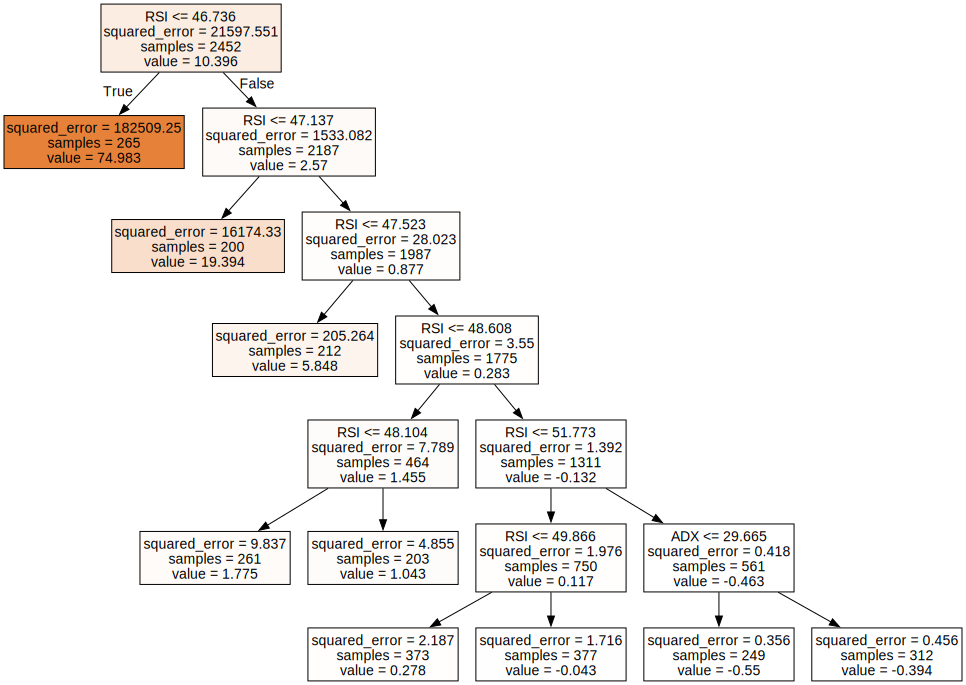

In [59]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtr,
                  out_file=None,
                  filled=True,
                  feature_names=predictors_list)
graphviz.Source(dot_data)

In [60]:
predictors_list

['ATR',
 'ADX',
 'RSI',
 'SMA',
 'ClgtEMA12',
 'ClgtEMA26',
 'ClgtMA12',
 'ClgtMA26',
 'MACDSIGgtMACD']